In [0]:
# Import libraries
import pandas as pd

In [2]:
# Load data
train_token_o = pd.read_csv('QE-2018-task4-titles-categories-and-ids_training.txt', sep='\t', 
                            header=None)
dev_token_o = pd.read_csv('QE-2018-task4-titles-categories-and-ids_dev.txt', sep='\t', 
                          header=None)
train_token = pd.concat([train_token_o, dev_token_o], ignore_index=True)

train_token.columns = ["doc_no", "asin", "title", "token"]
train_token.head()

,doc_no,asin,title,token
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...
3,doc0003,NaN,Joan Wulff's Dynamics of Fly Casting [VHS],NaN
4,doc0004,NaN,Yoga With Richard Freeman: Ashtanga Yoga: The...,NaN


In [3]:
train_token = train_token.fillna('')
print('Shape of the new training dataset:', train_token.shape)
train_token.head(10)

Shape of the new training dataset: (1200, 4)


,doc_no,asin,title,token
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...


# Split the given token in different columns

In [4]:
train_token["token_list"] = train_token.token.str.split('@@') 
train_token.head(10)

,doc_no,asin,title,token,token_list
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical,"[CDs_&_Vinyl, Classical]"
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room..."
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access..."
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],,[]
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,,[]
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room..."
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access..."
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness,"[Sports_&_Outdoors, Exercise_&_Fitness]"
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng..."
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi..."


In [5]:
train_token["len_token_list"] = train_token.token_list.str.len()
train_token.head(10)

,doc_no,asin,title,token,token_list,len_token_list
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical,"[CDs_&_Vinyl, Classical]",2
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",3
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],,[],1
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,,[],1
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",4
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness,"[Sports_&_Outdoors, Exercise_&_Fitness]",2
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",4
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",5


In [6]:
train_token.describe()

,len_token_list
count,1200.000000
mean,4.337500
std,0.969214
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,6.000000


In [7]:
train_token.len_token_list.value_counts()

5    510
4    479
3     87
6     66
1     34
2     24
Name: len_token_list, dtype: int64

In [8]:
def pad_list(data, max_len=6):
    data["token_list_pad"] = ""
    for index, row in data.iterrows():
        pad_number = max_len - row.len_token_list
        data.at[index, "token_list_pad"] = row.token_list + ([""] * pad_number)
    return data

train_token = pad_list(train_token, 6)
train_token.head(10)

,doc_no,asin,title,token,token_list,len_token_list,token_list_pad
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical,"[CDs_&_Vinyl, Classical]",2,"[CDs_&_Vinyl, Classical, , , , ]"
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",3,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room..."
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access..."
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],,[],1,"[, , , , , ]"
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,,[],1,"[, , , , , ]"
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",4,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room..."
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access..."
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness,"[Sports_&_Outdoors, Exercise_&_Fitness]",2,"[Sports_&_Outdoors, Exercise_&_Fitness, , , , ]"
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng..."
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",5,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi..."


In [9]:
train_token["len_token_list_pad"] = train_token.token_list_pad.str.len()
train_token.head(10)

,doc_no,asin,title,token,token_list,len_token_list,token_list_pad,len_token_list_pad
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical,"[CDs_&_Vinyl, Classical]",2,"[CDs_&_Vinyl, Classical, , , , ]",6
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",3,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",6
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",6
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],,[],1,"[, , , , , ]",6
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,,[],1,"[, , , , , ]",6
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",4,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",6
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",6
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness,"[Sports_&_Outdoors, Exercise_&_Fitness]",2,"[Sports_&_Outdoors, Exercise_&_Fitness, , , , ]",6
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",6
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",5,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",6


In [10]:
train_token.describe()

,len_token_list,len_token_list_pad
count,1200.000000,1200.0
mean,4.337500,6.0
std,0.969214,0.0
min,1.000000,6.0
25%,4.000000,6.0
50%,4.000000,6.0
75%,5.000000,6.0
max,6.000000,6.0


In [11]:
train_token[["sub_cat_1", "sub_cat_2", "sub_cat_3", "sub_cat_4", "sub_cat_5", "sub_cat_6"]] = pd.DataFrame(train_token.token_list_pad.values.tolist(), index=train_token.index)
train_token.head(10)

,doc_no,asin,title,token,token_list,len_token_list,token_list_pad,len_token_list_pad,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_4,sub_cat_5,sub_cat_6
0,doc0000,1591791065,Kirtan,CDs_&_Vinyl@@Classical,"[CDs_&_Vinyl, Classical]",2,"[CDs_&_Vinyl, Classical, , , , ]",6,CDs_&_Vinyl,Classical,,,,
1,doc0001,158042127X,Championship No-Limit &amp; Pot-Limit Hold'Em,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",3,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",6,Sports_&_Outdoors,Leisure_Sports_&_Game_Room,Casino_Equipment,,,
2,doc0002,7245456259,Black Mountain Products Single Resistance Band...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",6,Sports_&_Outdoors,Exercise_&_Fitness,Accessories,Exercise_Bands,,
3,doc0003,,Joan Wulff's Dynamics of Fly Casting [VHS],,[],1,"[, , , , , ]",6,,,,,,
4,doc0004,,Yoga With Richard Freeman: Ashtanga Yoga: The...,,[],1,"[, , , , , ]",6,,,,,,
5,doc0005,1400659477,The Learning Journey Techno Gears Marble Mania...,Sports_&_Outdoors@@Leisure_Sports_&_Game_Room@...,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",4,"[Sports_&_Outdoors, Leisure_Sports_&_Game_Room...",6,Sports_&_Outdoors,Leisure_Sports_&_Game_Room,Darts_&_Equipment,Dartboards,,
6,doc0006,7245456313,Black Mountain Products Resistance Band Set wi...,Sports_&_Outdoors@@Exercise_&_Fitness@@Accesso...,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Access...",6,Sports_&_Outdoors,Exercise_&_Fitness,Accessories,Exercise_Bands,,
7,doc0007,0965042138,Combat Conditioning: Functional Exercises for ...,Sports_&_Outdoors@@Exercise_&_Fitness,"[Sports_&_Outdoors, Exercise_&_Fitness]",2,"[Sports_&_Outdoors, Exercise_&_Fitness, , , , ]",6,Sports_&_Outdoors,Exercise_&_Fitness,,,,
8,doc0008,7245456321,Black Mountain Products New Heavy Duty Bmp Doo...,Sports_&_Outdoors@@Exercise_&_Fitness@@Strengt...,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",4,"[Sports_&_Outdoors, Exercise_&_Fitness, Streng...",6,Sports_&_Outdoors,Exercise_&_Fitness,Strength_Training_Equipment,Pull-Up_Bars,,
9,doc0009,B00KWR4CIM,Purple,Sports_&_Outdoors@@Outdoor_Gear@@Camping_&_Hik...,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",5,"[Sports_&_Outdoors, Outdoor_Gear, Camping_&_Hi...",6,Sports_&_Outdoors,Outdoor_Gear,Camping_&_Hiking,Backpacks_&_Bags,Waist_Packs,


# Analyse the sub-categories

In [12]:
# Sub-category 1
train_token.sub_cat_1.describe(include=['O'])

count                  1200
unique                    4
top       Sports_&_Outdoors
freq                   1159
Name: sub_cat_1, dtype: object

In [13]:
train_token.sub_cat_1.unique()

array(['CDs_&_Vinyl', 'Sports_&_Outdoors', '', 'Sports & Outdoors'],
      dtype=object)

In [14]:
train_token.sub_cat_1.value_counts()

Sports_&_Outdoors    1159
Sports & Outdoors      23
                       11
CDs_&_Vinyl             7
Name: sub_cat_1, dtype: int64

In [15]:
# Sub-category 2
train_token.sub_cat_2.describe(include=['O'])

count             1200
unique              25
top       Outdoor_Gear
freq               236
Name: sub_cat_2, dtype: object

In [16]:
train_token.sub_cat_2.unique()

array(['Classical', 'Leisure_Sports_&_Game_Room', 'Exercise_&_Fitness',
       '', 'Outdoor_Gear', 'Classic_Rock', 'Golf', 'Hunting_&_Fishing',
       'Other_Sports', 'Alternative_Rock', 'Boating_&_Water_Sports',
       'Team_Sports', 'Cycling', 'Accessories', 'Paintball_&_Airsoft',
       'Fan_Shop', 'Action_Sports', 'Clothing', 'Dance_&_Electronic',
       'Racquet_Sports', 'Snow_Sports', 'Comedy_&_Spoken_Word',
       'Equestrian_Sports', 'Pop', "Children's_Music"], dtype=object)

In [17]:
train_token.sub_cat_2.value_counts()

Outdoor_Gear                  236
Hunting_&_Fishing             212
Exercise_&_Fitness            181
Accessories                    93
Cycling                        78
Clothing                       68
Boating_&_Water_Sports         67
Leisure_Sports_&_Game_Room     46
Team_Sports                    43
Paintball_&_Airsoft            39
                               34
Other_Sports                   31
Action_Sports                  18
Fan_Shop                       15
Golf                           15
Snow_Sports                     9
Racquet_Sports                  6
Equestrian_Sports               2
Comedy_&_Spoken_Word            1
Classic_Rock                    1
Dance_&_Electronic              1
Pop                             1
Alternative_Rock                1
Children's_Music                1
Classical                       1
Name: sub_cat_2, dtype: int64

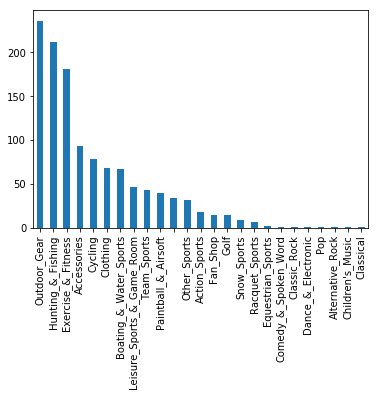

In [18]:
import matplotlib.pyplot as plt
train_token.sub_cat_2.value_counts().plot(kind="bar")

In [19]:
# Sub-category 3
train_token.sub_cat_3.describe(include=['O'])

count                 1200
unique                  99
top       Camping_&_Hiking
freq                   232
Name: sub_cat_3, dtype: object

In [20]:
train_token.sub_cat_3.value_counts()

Camping_&_Hiking                  232
Hunting                           156
Accessories                        87
                                   58
Strength_Training_Equipment        58
Men                                46
Swimming                           29
Sport_Watches                      29
Kids'_Bikes_&_Accessories          27
Airsoft                            26
Boating                            24
Electronics_&_Gadgets              23
Fishing                            22
Outdoor_Games_&_Activities         19
Car_Sports_Racks                   18
Cardio_Training                    16
Martial_Arts                       14
Airsoft,_Air_Guns_&_Slingshots     14
Women                              14
Boxing                             13
Paintball                          13
Scooters_&_Equipment               13
Archery                            12
Transportation_&_Storage           11
Balance_Trainers                    9
Diving_&_Snorkeling                 9
Basketball  

In [21]:
# Sub-category 4
train_token.sub_cat_4.describe(include=['O'])

count     1200
unique     224
top           
freq       145
Name: sub_cat_4, dtype: object

In [22]:
train_token.sub_cat_4.value_counts()

                                   145
Knives_&_Tools                      65
Camp_Kitchen                        60
Hunting_Optics                      51
Hunting_&_Tactical_Knives           26
Clothing                            19
Accessories                         19
Kids'_Tricycles                     19
Gun_Holsters,_Cases_&_Bags          18
Shirts                              17
Hydration                           16
Training_Equipment                  16
Exercise_Bands                      16
Bike_Racks                          16
Gun_Accessories                     15
Gloves                              14
Hunting_Accessories                 14
Socks                               13
Protective_Gear                     13
Personal_Care                       13
Lights_&_Lanterns                   12
Guns_&_Rifles                       12
Goggles                             12
Camp_Bedding                        12
Maintenance_Supplies                12
Exercise_Balls_&_Accessor

In [23]:
# Sub-category 5
train_token.sub_cat_5.describe(include=['O'])

count     1200
unique     187
top           
freq       624
Name: sub_cat_5, dtype: object

In [24]:
train_token.sub_cat_5.value_counts()

                                   624
Folding_Knives                      51
Gun_Scopes                          24
Hunting_Knives                      17
Camp_Stoves                         15
Men                                 13
Coolers                             13
Spotting_Scopes                     12
Campfire_Cookware                   12
Gun_Holsters                        11
Fixed-Blade_Knives                  11
Cleaners                            10
Insect_Repellent                     9
Water_Filters                        8
Women                                8
Earmuffs                             8
Air_Mattresses                       8
Hunting_Sharpeners                   8
Grips                                7
Flying_Discs                         7
Stove_Accessories                    7
Gun_Sights                           6
Rifles                               6
Masks                                6
Laser_Rangefinders                   6
Gunsmithing_Tools        

In [25]:
# Sub-category 6
train_token.sub_cat_6.describe(include=['O'])

count     1200
unique      30
top           
freq      1134
Name: sub_cat_6, dtype: object

In [26]:
train_token.sub_cat_6.value_counts()

                              1134
Rifle_Scopes                    15
Fixed_Blade_Hunting_Knives       6
Folding_Hunting_Knives           4
Fire_Starters                    4
Pants                            3
Socks                            3
Grills                           3
Portable                         2
Briefs                           2
Gloves                           2
Mess_Kits                        2
Self-Inflating_Pads              2
Iron_Sights                      2
Plastic_Bats                     1
Cups_&_Mugs                      1
Baseball_Caps                    1
Ice_Augers                       1
Jammers                          1
Bibs                             1
Sun_Hats                         1
Leotards                         1
Shorts                           1
Battery_Chargers                 1
Cornhole_Bags                    1
Two-Piece_Suits                  1
Jerseys                          1
Bodysuits                        1
Hats                

# Change the sub-category 2 to dummy variables

## For the 1% threshold

In [0]:
# Based on their occurence (less than 1%)
list_not_useful_1 = ["Snow_Sports", "Racquet_Sports", "Equestrian_Sports", "Children's_Music", 
                   "Pop", "Classic_Rock", "Comedy_&_Spoken_Word", "Alternative_Rock", 
                   "Dance_&_Electronic", "Classical"]

list_not_useful_regex_1 = "|".join(list_not_useful_1)

In [0]:
train_token["sub_cat_split_1"] = train_token.sub_cat_2
train_token.sub_cat_split_1 = train_token.sub_cat_split_1.str.replace(list_not_useful_regex_1, '')

In [29]:
train_token.sub_cat_split_1.value_counts()

Outdoor_Gear                  236
Hunting_&_Fishing             212
Exercise_&_Fitness            181
Accessories                    93
Cycling                        78
Clothing                       68
Boating_&_Water_Sports         67
                               58
Leisure_Sports_&_Game_Room     46
Team_Sports                    43
Paintball_&_Airsoft            39
Other_Sports                   31
Action_Sports                  18
Fan_Shop                       15
Golf                           15
Name: sub_cat_split_1, dtype: int64

In [30]:
# Tokens present in more than 1% of the documents
sub_cat_kept_1 = train_token.sub_cat_split_1.unique().tolist()
print(sub_cat_kept_1)

['', 'Leisure_Sports_&_Game_Room', 'Exercise_&_Fitness', 'Outdoor_Gear', 'Golf', 'Hunting_&_Fishing', 'Other_Sports', 'Boating_&_Water_Sports', 'Team_Sports', 'Cycling', 'Accessories', 'Paintball_&_Airsoft', 'Fan_Shop', 'Action_Sports', 'Clothing']


In [31]:
train_token_dummy_1 = pd.get_dummies(train_token["sub_cat_split_1"], drop_first=True, dtype=float)
print('Shape of the token features:', train_token_dummy_1.shape)
train_token_dummy_1.head(10)

Shape of the token features: (1200, 14)


,Accessories,Action_Sports,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Fan_Shop,Golf,Hunting_&_Fishing,Leisure_Sports_&_Game_Room,Other_Sports,Outdoor_Gear,Paintball_&_Airsoft,Team_Sports
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## For the 5% threshold

In [0]:
# Based on their occurence (less than 5%)
list_not_useful_5 = ['Leisure_Sports_&_Game_Room', 'Team_Sports', 'Paintball_&_Airsoft', 
                     'Other_Sports', 'Action_Sports', 'Fan_Shop', 'Golf']

list_not_useful_regex_5 = "|".join(list_not_useful_5)

In [33]:
train_token["sub_cat_split_5"] = train_token.sub_cat_split_1
train_token.sub_cat_split_5 = train_token.sub_cat_split_5.str.replace(list_not_useful_regex_5, '')
train_token.sub_cat_split_5.value_counts()

                          265
Outdoor_Gear              236
Hunting_&_Fishing         212
Exercise_&_Fitness        181
Accessories                93
Cycling                    78
Clothing                   68
Boating_&_Water_Sports     67
Name: sub_cat_split_5, dtype: int64

In [34]:
# Tokens present in more than 5% of the documents
sub_cat_kept_5 = train_token.sub_cat_split_5.unique().tolist()
print(sub_cat_kept_5)

['', 'Exercise_&_Fitness', 'Outdoor_Gear', 'Hunting_&_Fishing', 'Boating_&_Water_Sports', 'Cycling', 'Accessories', 'Clothing']


In [35]:
train_token_dummy_5 = pd.get_dummies(train_token["sub_cat_split_5"], drop_first=True, dtype=float)
print('Shape of the token features:', train_token_dummy_5.shape)
train_token_dummy_5.head(10)

Shape of the token features: (1200, 7)


,Accessories,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Hunting_&_Fishing,Outdoor_Gear
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## For the 10% threshold

In [0]:
# Based on their occurence (less than 10%)
list_not_useful_10 = ['Boating_&_Water_Sports', 'Cycling', 'Accessories', 'Clothing']

list_not_useful_regex_10 = "|".join(list_not_useful_10)

In [37]:
train_token["sub_cat_split_10"] = train_token.sub_cat_split_5
train_token.sub_cat_split_10 = train_token.sub_cat_split_10.str.replace(list_not_useful_regex_10, '')
train_token.sub_cat_split_10.value_counts()

                      571
Outdoor_Gear          236
Hunting_&_Fishing     212
Exercise_&_Fitness    181
Name: sub_cat_split_10, dtype: int64

In [38]:
# Tokens present in more than 10% of the documents
sub_cat_kept_10 = train_token.sub_cat_split_10.unique().tolist()
print(sub_cat_kept_10)

['', 'Exercise_&_Fitness', 'Outdoor_Gear', 'Hunting_&_Fishing']


In [39]:
train_token_dummy_10 = pd.get_dummies(train_token["sub_cat_split_10"], drop_first=True, dtype=float)
print('Shape of the token features:', train_token_dummy_10.shape)
train_token_dummy_10.head(10)

Shape of the token features: (1200, 3)


,Exercise_&_Fitness,Hunting_&_Fishing,Outdoor_Gear
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


# Merge data

## With the 1% threshold

In [40]:
quest_bl_train = pd.read_csv("quest_baseline.training", header=None, sep="\t")
print('Shape of the baseline training data:', quest_bl_train.shape)
quest_bl_train.head()

Shape of the baseline training data: (1200, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830508,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0


In [44]:
quest_bl_train_token_1 = pd.concat([quest_bl_train, train_token_dummy_1], axis=1)
print('Shape of the baseline training data with token:', quest_bl_train_token_1.shape)
quest_bl_train_token_1.head()

Shape of the baseline training data with token: (1200, 29)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Accessories,Action_Sports,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Fan_Shop,Golf,Hunting_&_Fishing,Leisure_Sports_&_Game_Room,Other_Sports,Outdoor_Gear,Paintball_&_Airsoft,Team_Sports
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830508,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
quest_bl_train_token_1.to_csv("quest_bl_token_1.train", header=None, index=None, sep="\t")

In [45]:
quest_vis_train = pd.read_csv("quest.train_2", header=None, sep="\t")
print('Shape of the visual training data:', quest_vis_train.shape)
quest_vis_train.head()

Shape of the visual training data: (1200, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0,-10.842554,0.383791
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0,-12.611924,-15.891151
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0,3.557573,-8.661565
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0,-1.067465,-2.757689
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830509,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0,-1.067465,-2.757689


In [46]:
quest_vis_train_token_1 = pd.concat([quest_vis_train, train_token_dummy_1], axis=1)
print('Shape of the visual training data with token:', quest_vis_train_token_1.shape)
quest_vis_train_token_1.head()

Shape of the visual training data with token: (1200, 31)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Accessories,Action_Sports,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Fan_Shop,Golf,Hunting_&_Fishing,Leisure_Sports_&_Game_Room,Other_Sports,Outdoor_Gear,Paintball_&_Airsoft,Team_Sports
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0,-10.842554,0.383791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0,-12.611924,-15.891151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0,3.557573,-8.661565,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0,-1.067465,-2.757689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830509,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0,-1.067465,-2.757689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
quest_vis_train_token_1.to_csv("quest_vis_token_1.train", header=None, index=None, sep="\t")

## With the 5% threshold

In [49]:
quest_bl_train_token_5 = pd.concat([quest_bl_train, train_token_dummy_5], axis=1)
print('Shape of the baseline training data with token:', quest_bl_train_token_5.shape)
quest_bl_train_token_5.to_csv("quest_bl_token_5.train", header=None, index=None, sep="\t")

Shape of the baseline training data with token: (1200, 22)


In [50]:
quest_vis_train_token_5 = pd.concat([quest_vis_train, train_token_dummy_5], axis=1)
print('Shape of the visual training data with token:', quest_vis_train_token_5.shape)
quest_vis_train_token_5.to_csv("quest_vis_token_5.train", header=None, index=None, sep="\t")

Shape of the visual training data with token: (1200, 24)


## With the 10% threshold

In [52]:
quest_bl_train_token_10 = pd.concat([quest_bl_train, train_token_dummy_10], axis=1)
print('Shape of the baseline training data with token:', quest_bl_train_token_10.shape)
quest_bl_train_token_10.to_csv("quest_bl_token_10.train", header=None, index=None, sep="\t")

Shape of the baseline training data with token: (1200, 18)


In [53]:
quest_vis_train_token_10 = pd.concat([quest_vis_train, train_token_dummy_10], axis=1)
print('Shape of the visual training data with token:', quest_vis_train_token_10.shape)
quest_vis_train_token_10.to_csv("quest_vis_token_10.train", header=None, index=None, sep="\t")

Shape of the visual training data with token: (1200, 20)


# Test data

In [87]:
# Load data
test_token = pd.read_csv('QE-2018-task4-titles-categories-and-ids_test.txt', sep='\t', header=None)
test_token.columns = ["doc_no", "asin", "title", "token"]
test_token.head()

,doc_no,asin,title,token
0,doc0000,B0009MZVJY,Thorlo Men's Lite Running Mini Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
1,doc0001,B0009MZUW2,Thorlo Unisex Running Mini-Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
2,doc0002,B0009MZVHG,Thorlo Women's Lite Running Micro-Mini Low-Cu...,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
3,doc0003,B0009MD9Q6,Pillar Men's Yoga Short w/inner liner (Dryflex...,Sports_&_Outdoors@@Exercise_&_Fitness@@Yoga@@C...
4,doc0004,B0009MZUO0,Thorlo UnisexRunning Rolltop Sock,Sports_&_Outdoors@@Clothing@@Men@@Socks


In [88]:
test_token = test_token.fillna('')
print('Shape of the test data:', test_token.shape)
test_token.head()

Shape of the test data: (269, 4)


,doc_no,asin,title,token
0,doc0000,B0009MZVJY,Thorlo Men's Lite Running Mini Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
1,doc0001,B0009MZUW2,Thorlo Unisex Running Mini-Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
2,doc0002,B0009MZVHG,Thorlo Women's Lite Running Micro-Mini Low-Cu...,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...
3,doc0003,B0009MD9Q6,Pillar Men's Yoga Short w/inner liner (Dryflex...,Sports_&_Outdoors@@Exercise_&_Fitness@@Yoga@@C...
4,doc0004,B0009MZUO0,Thorlo UnisexRunning Rolltop Sock,Sports_&_Outdoors@@Clothing@@Men@@Socks


In [89]:
test_token["token_list"] = test_token.token.str.split('@@') 
test_token.head()

,doc_no,asin,title,token,token_list
0,doc0000,B0009MZVJY,Thorlo Men's Lite Running Mini Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...,"[Sports_&_Outdoors, Exercise_&_Fitness, Runnin..."
1,doc0001,B0009MZUW2,Thorlo Unisex Running Mini-Crew Sock,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...,"[Sports_&_Outdoors, Exercise_&_Fitness, Runnin..."
2,doc0002,B0009MZVHG,Thorlo Women's Lite Running Micro-Mini Low-Cu...,Sports_&_Outdoors@@Exercise_&_Fitness@@Running...,"[Sports_&_Outdoors, Exercise_&_Fitness, Runnin..."
3,doc0003,B0009MD9Q6,Pillar Men's Yoga Short w/inner liner (Dryflex...,Sports_&_Outdoors@@Exercise_&_Fitness@@Yoga@@C...,"[Sports_&_Outdoors, Exercise_&_Fitness, Yoga, ..."
4,doc0004,B0009MZUO0,Thorlo UnisexRunning Rolltop Sock,Sports_&_Outdoors@@Clothing@@Men@@Socks,"[Sports_&_Outdoors, Clothing, Men, Socks]"


In [90]:
test_token["len_token_list"] = test_token.token_list.str.len()
test_token.len_token_list.value_counts()

5    112
4     97
3     33
6     23
1      3
2      1
Name: len_token_list, dtype: int64

In [0]:
def pad_list(data, max_len=6):
    data["token_list_pad"] = ""
    for index, row in data.iterrows():
        pad_number = max_len - row.len_token_list
        data.at[index, "token_list_pad"] = row.token_list + ([""] * pad_number)
    return data

test_token = pad_list(test_token, 6)

In [0]:
test_token["len_token_list_pad"] = test_token.token_list_pad.str.len()

In [0]:
test_token[["sub_cat_1", "sub_cat_2", "sub_cat_3", "sub_cat_4", "sub_cat_5", "sub_cat_6"]] = pd.DataFrame(test_token.token_list_pad.values.tolist(), index=test_token.index)

In [94]:
test_sub_cat_2_list = test_token.sub_cat_2.unique().tolist()
print('All sub-categories:', test_sub_cat_2_list)
print('Sub-categories not kept:', [test_sub_cat for test_sub_cat in test_sub_cat_2_list if test_sub_cat not in sub_cat_kept_1])

All sub-categories: ['Exercise_&_Fitness', 'Clothing', 'Fan_Shop', 'Hunting_&_Fishing', 'Outdoor_Gear', 'Racquet_Sports', 'Paintball_&_Airsoft', 'Cycling', 'Team_Sports', 'Accessories', 'Other_Sports', 'Boating_&_Water_Sports', 'Leisure_Sports_&_Game_Room', '', 'Action_Sports', 'Snow_Sports', 'Golf', 'Cell_Phones', 'Equestrian_Sports']
Sub-categories not kept: ['Racquet_Sports', 'Snow_Sports', 'Cell_Phones', 'Equestrian_Sports']


In [0]:
list_not_useful_test_1 = [test_sub_cat for test_sub_cat in test_sub_cat_2_list if test_sub_cat not in sub_cat_kept_1]
list_not_useful_regex_test_1 = "|".join(list_not_useful_test_1)

In [0]:
test_token["sub_cat_split_1"] = test_token.sub_cat_2
test_token.sub_cat_split_1 = test_token.sub_cat_split_1.str.replace(list_not_useful_regex_test_1, '')

In [97]:
test_sub_cat_kept_1 = test_token.sub_cat_split_1.unique().tolist()
print('Kept sub-categories:', test_sub_cat_kept_1)

Kept sub-categories: ['Exercise_&_Fitness', 'Clothing', 'Fan_Shop', 'Hunting_&_Fishing', 'Outdoor_Gear', '', 'Paintball_&_Airsoft', 'Cycling', 'Team_Sports', 'Accessories', 'Other_Sports', 'Boating_&_Water_Sports', 'Leisure_Sports_&_Game_Room', 'Action_Sports', 'Golf']


In [98]:
test_token_dummy_1 = pd.get_dummies(test_token["sub_cat_split_1"], drop_first=True, dtype=float)
print('Shape of the test data with token', test_token_dummy_1.shape)
test_token_dummy_1.head()

Shape of the test data with token (269, 14)


,Accessories,Action_Sports,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Fan_Shop,Golf,Hunting_&_Fishing,Leisure_Sports_&_Game_Room,Other_Sports,Outdoor_Gear,Paintball_&_Airsoft,Team_Sports
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Threshold 5%
test_sub_cat_split_1_list = test_token.sub_cat_split_1.unique().tolist()
list_not_useful_test_5 = [test_sub_cat for test_sub_cat in test_sub_cat_split_1_list if test_sub_cat not in sub_cat_kept_5]
list_not_useful_regex_test_5 = "|".join(list_not_useful_test_5)

In [100]:
test_token["sub_cat_split_5"] = test_token.sub_cat_split_1
test_token.sub_cat_split_5 = test_token.sub_cat_split_5.str.replace(list_not_useful_regex_test_5, '')

test_sub_cat_kept_5 = test_token.sub_cat_split_5.unique().tolist()
print('Kept sub-categories:', test_sub_cat_kept_5)

Kept sub-categories: ['Exercise_&_Fitness', 'Clothing', '', 'Hunting_&_Fishing', 'Outdoor_Gear', 'Cycling', 'Accessories', 'Boating_&_Water_Sports']


In [101]:
test_token_dummy_5 = pd.get_dummies(test_token["sub_cat_split_5"], drop_first=True, dtype=float)
print('Shape of the test data with token', test_token_dummy_5.shape)
test_token_dummy_5.head()

Shape of the test data with token (269, 7)


,Accessories,Boating_&_Water_Sports,Clothing,Cycling,Exercise_&_Fitness,Hunting_&_Fishing,Outdoor_Gear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
# Threshold 10%
test_sub_cat_split_5_list = test_token.sub_cat_split_5.unique().tolist()
list_not_useful_test_10 = [test_sub_cat for test_sub_cat in test_sub_cat_split_5_list if test_sub_cat not in sub_cat_kept_10]
list_not_useful_regex_test_10 = "|".join(list_not_useful_test_10)

In [103]:
test_token["sub_cat_split_10"] = test_token.sub_cat_split_5
test_token.sub_cat_split_10 = test_token.sub_cat_split_10.str.replace(list_not_useful_regex_test_10, '')

test_sub_cat_kept_10 = test_token.sub_cat_split_10.unique().tolist()
print('Kept sub-categories:', test_sub_cat_kept_10)

Kept sub-categories: ['Exercise_&_Fitness', '', 'Hunting_&_Fishing', 'Outdoor_Gear']


In [104]:
test_token_dummy_10 = pd.get_dummies(test_token["sub_cat_split_10"], drop_first=True, dtype=float)
print('Shape of the test data with token', test_token_dummy_10.shape)
test_token_dummy_10.head()

Shape of the test data with token (269, 3)


,Exercise_&_Fitness,Hunting_&_Fishing,Outdoor_Gear
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


## Merge data

In [105]:
quest_bl_test = pd.read_csv("quest_baseline.test", header=None, sep="\t")
print('Shape of the baseline test data:', quest_bl_test.shape)
quest_bl_test.head()

Shape of the baseline test data: (269, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.0,9.0,2.125000,-24.07420,-39.10530,1.000000,0.0,0.375000,0.000000,0.071429,0.0,0.0,0.437500,0.0,0.0
1,8.0,7.0,2.285714,-23.01260,-32.45460,1.000000,0.0,0.428571,0.000000,0.083333,0.0,0.0,0.500000,0.0,0.0
2,12.0,9.0,2.045454,-41.24530,-28.27830,1.000000,0.0,0.363636,0.100000,0.000000,0.0,0.0,0.409091,0.0,0.0
3,14.0,15.0,1.846154,-36.11030,-50.68360,1.071428,0.0,0.384615,0.041667,0.041667,0.0,0.0,0.423077,0.0,0.0
4,5.0,5.0,3.750000,-9.04518,-7.96785,1.000000,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.0


In [106]:
quest_bl_test_token_1 = pd.concat([quest_bl_test, test_token_dummy_1], axis=1)
print(quest_bl_test_token_1.shape)
quest_bl_test_token_1.to_csv("quest_bl_token_1.test", header=None, index=None, sep="\t")

(269, 29)


In [107]:
quest_vis_test = pd.read_csv("quest.test_2", header=None, sep="\t")
print(quest_vis_test.shape)
quest_vis_test.head()

(269, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,9.0,9.0,2.125000,-24.07420,-39.10530,1.000000,0.0,0.375000,0.000000,0.071429,0.0,0.0,0.437500,0.0,0.0,-11.316785,16.170978
1,8.0,7.0,2.285714,-23.01260,-32.45460,1.000000,0.0,0.428571,0.000000,0.083333,0.0,0.0,0.500000,0.0,0.0,-13.074886,18.147145
2,12.0,9.0,2.045454,-41.24530,-28.27830,1.000000,0.0,0.363636,0.100000,0.000000,0.0,0.0,0.409091,0.0,0.0,-13.344120,13.453017
3,14.0,15.0,1.846154,-36.11030,-50.68360,1.071428,0.0,0.384615,0.041667,0.041667,0.0,0.0,0.423077,0.0,0.0,-12.855571,26.806394
4,5.0,5.0,3.750000,-9.04518,-7.96785,1.000000,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.0,-16.015124,17.029873


In [108]:
quest_vis_test_token_1 = pd.concat([quest_vis_test, test_token_dummy_1], axis=1)
print(quest_vis_test_token_1.shape)
quest_vis_test_token_1.to_csv("quest_vis_token_1.test", header=None, index=None, sep="\t")

(269, 31)


In [109]:
# Threshold 5%
quest_bl_test_token_5 = pd.concat([quest_bl_test, test_token_dummy_5], axis=1)
print(quest_bl_test_token_5.shape)
quest_bl_test_token_5.to_csv("quest_bl_token_5.test", header=None, index=None, sep="\t")

(269, 22)


In [110]:
quest_vis_test_token_5 = pd.concat([quest_vis_test, test_token_dummy_5], axis=1)
print(quest_vis_test_token_5.shape)
quest_vis_test_token_5.to_csv("quest_vis_token_5.test", header=None, index=None, sep="\t")

(269, 24)


In [111]:
# Threshold 10%
quest_bl_test_token_10 = pd.concat([quest_bl_test, test_token_dummy_10], axis=1)
print(quest_bl_test_token_10.shape)
quest_bl_test_token_10.to_csv("quest_bl_token_10.test", header=None, index=None, sep="\t")

(269, 18)


In [112]:
quest_vis_test_token_10 = pd.concat([quest_vis_test, test_token_dummy_10], axis=1)
print(quest_vis_test_token_10.shape)
quest_vis_test_token_10.to_csv("quest_vis_token_10.test", header=None, index=None, sep="\t")

(269, 20)
